<a href="https://colab.research.google.com/drive/1br0hM79ORTVNXUpVgkV5t4o4AigGxfwk?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch

In this tutorial, we are going to implement a linear regression model to predict california housing prices. We will build the model from scratch using numpy. This will be a great approach to begin understanding regression based models.

After completing this tutorial the learner is expected to know the basic building blocks of a linear regression model. The learner is also expected to know the pipeline of reading and transforming data for machine learning workflows.  

1. 学习使用线性回归模型预测加州的房价--掌握关于线性回归模型的基础模块  
2. 了解--know the pipeline of reading and transforming data for machine learning workflows



In [40]:
## Import the usual libraries
import numpy as np                  # 处理数组和矩阵
import pandas as pd                 # Pandas 是 Python 的核心数据分析支持库，提供了快速、灵活、明确的数据结构，旨在简单、直观地处理关系型、标记型数据。Pandas 的主要数据结构是 Series（一维数据）与 DataFrame（二维数据）.
from sklearn.datasets import fetch_california_housing   # 导入 fetch_california_housing 数据集
from sklearn.model_selection import train_test_split    # 导入数据切分函数
from sklearn.preprocessing import StandardScaler        # 导入归一化工具
import matplotlib.pyplot as plt                         # 绘图

# Importing the dataset

The real-world dataset can be obtained by the function `fetch_california_housing` that downloads the dataset for us. 

The `as_frame` parameter returns a pandas dataframe which is a library useful for viewing contents of the data.



In [41]:
# Fetch the data using sklearn function
bunch = fetch_california_housing(download_if_missing=True, as_frame=True)   # 使用 sklearn 的函数下载数据

# Load the dataframe and view
df = bunch.frame    # 加载数据集，转换为dataframe格式(pandas 库)
# 数据名.head( ) ：是指取数据的前n行数据，默认是前5行。需要注意的是没有print语句，python中的head（）函数只是选择数据，而不对数据内容做任何改变。
df.head()           # 打印前五行数据
# 人均收入(MedInc)、房龄(HouseAge)、房间数(AveRooms)、卧室数(AveBedrooms)、小区人口数(Population)、房屋居住人数(AveOccup)、小区经度(Longitude)、小区纬度(Latitude)和房价中位数(Median_house_value)。其中，房价中位数是标签，其余的8个变量均为特征。

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


For this dataset, our target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

We can take a closer look at the various statistical parameters of the dataset using pandas. The `describe` function will help us.

In [42]:
df.describe()   # 返回数据集的统计变量
# count：数量统计，此列共有多少有效值
# mean：均值
# std：标准差
# min：最小值
# 25%：四分之一分位数
# 50%：二分之一分位数
# 75%：四分之三分位数
# max：最大值
# unipue：不同的值有多少个

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


As we can see the data in each of the columns is on different scales. For example, the average bedroom value is around 1 and the average population is around 1425. 

Generally, machine learing models do not work well when the data is on different scales. Thus, we have to normalize our data in the range [-1,1]. The module [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) will help us in this.  
normalize data : 归一化 , 使用 [StandardScalar] 模块

The training data should always be normalized. The testing data should be normalized using the values of the training data. 

In [43]:
# !wget https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv
# import pandas as pd
# df  = pd.read_csv("Fish.csv")
# y = df['Weight']
# x = df[["Length1", "Length2", "Length3", "Height", "Width","Weight"]]

df = bunch.frame    # 加载数据集，转换为dataframe格式(pandas 库)
x = df.iloc[:,:-1]  # Select all the columns, except the last column    选择除最后一列外的所有列作为特征向量
y = df.iloc[:,-1:]  # Select the last column                            选择最后一列作为标记向量
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)   # 按照测试集占0.33的比例划分训练集和测试集

input_scalar = StandardScaler()     # 实例化 StandardScaler 类，用于处理输入（归一化、反归一化）
output_scalar = StandardScaler()    # 实例化 StandardScaler 类，用于处理输出（归一化、反归一化）

x_train = input_scalar.fit_transform(x_train).T # Normalize train data                          归一化训练数据的输入向量(特征向量); .fit_transform():进行标准化，降维、归一化等操作; .T将矩阵转置
x_test = input_scalar.transform(x_test).T # Only transform test data using values of train data 归一化测试数据的输入向量(特征向量)

y_train = output_scalar.fit_transform(y_train).reshape(-1)  # 归一化训练数据的输出向量(标记); .fit_transform():进行标准化，降维、归一化等操作; reshape(-1) : 更改数组的形状,变为1列
y_test = output_scalar.transform(y_test).reshape(-1)        # 归一化测试数据的输出向量(标记); 

dataset_copy = [ x_train.copy(), x_test.copy(),  y_train.copy(),  y_test.copy()]    # 将归一化的数据copy到dataset_copy数组中 用于后续验证sklearn.linear_model 线性回归库

# Linear Regression Model

Now we define our linear regression model from scratch.

A linear regression model is of the form:

$y = a_1 x_1 + a_2 x_2 + \dots + a_nx_n + a_{n+1}$
  
The above can be rewritten using matrix multiplication as

$ y = w^T x $

where 

$ w = [a_1, a_2, \dots,  a_n, a_{n+1}]^T $

$ x = [x_1, x_2, \dots,  x_n]^T $


In [44]:
class LinearRegression():   # 定义线性回归类
  def __init__(self, dim, lr = 0.1):  # 初始化  dim:维度； lr：学习率
    assert isinstance # 断言 assert ； isinstance()函数是Python中的一个内置函数，用于判断一个对象是否是指定类型的实例
    self.lr = lr      # 初始化学习率
    self.w = np.zeros((dim))  # 创建一个dim维，初始值为0的参数向量w
    self.grads = {"dw": np.zeros((dim)) +5} # 创建grads(梯度)字典数据结构--保存损失值 loss； key值:"dw"; 值为 w 向量+5 （向量加法，等同于同维值为5的向量)


  def forward(self, x): # 前向传播，即计算预测值y
    y = self.w.T @ x    # @ 标识矩阵乘法; 即 y = wT * x
    return y
  
  def backward(self, x, y_hat, y):  # 梯度下降法进行反向传播 x:特征向量; y_hat:预测值; y:标记 
    assert y_hat.shape == y.shape   # 如果 y_hat 的形状和 y 的形状不相等，进行assert
    self.grads["dw"] = (1 / x.shape[1]) * ((y_hat - y) @ x.T).T   # 梯度下降法 推导可参见 https://blog.csdn.net/qq_42359956/article/details/105971920
    assert self.grads["dw"].shape == self.w.shape   # 如果grads["dw"] 的形状和 w 的形状不相等，进行assert
    
    # print(self.grads["dw"])

  def optimize(self): # 优化参数
    self.w = self.w - self.lr * self.grads["dw"]  # 使用梯度更新参数w

# Loss

For linear regression, various loss functions such as the mean absolute error, mean squared error, or root mean squared error can be used.

In this example, we will use the mean squared error (MSE) loss.

The MSE loss is given by 

$ error = \frac{1}{m} Σ_{i=1}^{m} (y_{true}^{i} - y_{pred}^{i})^2 $ 

where $i$ denotes the particular obseration/row in the dataset and $m$ is the total number of obserations.

To ensure our model is correct, the loss should decrease over each epoch.


Epoch 0 | Train Loss 0.49999999999999983 | Test Loss 0.43712002508129305
Epoch 20 | Train Loss 0.2359010824314295 | Test Loss 0.2325611904818386
Epoch 40 | Train Loss 0.22188755162559423 | Test Loss 0.2217635127918686
Epoch 60 | Train Loss 0.21474640752415047 | Test Loss 0.2152613227580797
Epoch 80 | Train Loss 0.2095989567021037 | Test Loss 0.21037193610067245
Epoch 100 | Train Loss 0.20581761895152345 | Test Loss 0.20673038702760732
Epoch 120 | Train Loss 0.20303294882659725 | Test Loss 0.20402527473733864
Epoch 140 | Train Loss 0.20097918345162274 | Test Loss 0.20201418597478873
Epoch 160 | Train Loss 0.19946210112703647 | Test Loss 0.20051638978054404
Epoch 180 | Train Loss 0.19833950070910428 | Test Loss 0.19939846923590557
Epoch 200 | Train Loss 0.19750719045004836 | Test Loss 0.19856209982480624
Epoch 220 | Train Loss 0.1968887724916989 | Test Loss 0.1979347869242644
Epoch 240 | Train Loss 0.19642818272324772 | Test Loss 0.19746302071881933
Epoch 260 | Train Loss 0.1960842406520

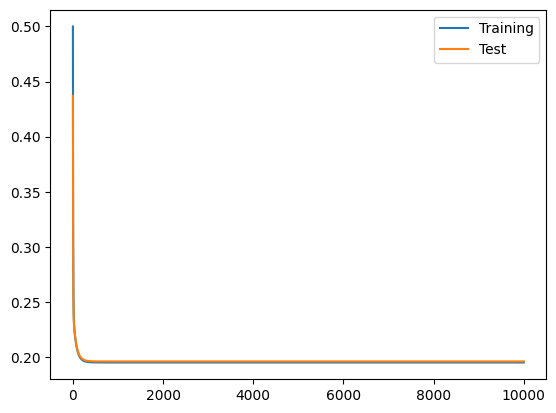

In [45]:
num_epochs = 10000        # 迭代轮次
train_loss_history = []   # 训练集每轮次损失值列表
test_loss_history = []    # 测试集每轮次损失值列表
w_history = []            # 每轮次参数列表
dim = x_train.shape[0]    # 参数维度（特征向量的维度）
num_train = x_train.shape[1]  # 训练集大小
num_test = x_test.shape[1]    # 测试集大小



model = LinearRegression(dim = dim, lr = 0.1)
for i in range(num_epochs):
  y_hat = model.forward(x_train)        # 对训练数据集进行预测
  train_loss = 1/(2 * num_train) * ((y_train - y_hat) ** 2).sum()   #  计算损失值。损失函数为均方误差损失 mean squared error (MSE) loss

  w_history.append(model.w)             # 保存上一轮参数w
  model.backward(x_train,y_hat,y_train) # 对训练集数据反向传播
  model.optimize()                      # 优化参数

  y_hat = model.forward(x_test)         # 对测试数据集进行预测
  test_loss = 1/(2 * num_test) * ((y_test - y_hat) ** 2).sum()      #  计算损失值

  train_loss_history.append(train_loss) # 保存本轮训练集损失
  test_loss_history.append(test_loss)   # 保存本轮测试集损失

  if i % 20 == 0: # 每20轮打印一次
    print(f"Epoch {i} | Train Loss {train_loss} | Test Loss {test_loss}") # 打印当前epoch、训练集损失、测试集损失

plt.plot(range(num_epochs), train_loss_history, label = "Training")   # 以epoch为x轴画出train_loss曲线
plt.plot(range(num_epochs), test_loss_history, label = "Test")        # 以epoch为x轴画出test_loss曲线
plt.legend()  # 添加图例
plt.show()    # 显示图形

# Results

Before viewing the results, we need to reverse the transformations applied on the output variable y.

The `inverse_transform` method of the StandardScaler object will help us.

In [35]:
from sklearn.metrics import mean_squared_error      # 导入sklearn中的均方误差函数
y_test = output_scalar.inverse_transform(y_test[np.newaxis,:])  # 对测试集数据进行反归一化
y_hat  = output_scalar.inverse_transform(y_hat[np.newaxis,:])   # 对最后一轮测试集的预测值进行反归一化
error = (((y_test - y_hat) ** 2).sum() / num_test )             # 对测试集计算预测的均方误差
print("Test Set Error", error)  # 打印均方误差值

Test Set Error 0.5263803029005855


# Libraries

Instead of coding everything from scratch, i.e the model, loss functions, and gradient calculations, there are many libaries that have implemented many machine learning algorithms for us.

These libraries will generally be faster and more optimized. We can use the LinearRegression and SGD regressor module from scikit learn to compare our model

In [36]:
from sklearn.linear_model import SGDRegressor


x_train, x_test, y_train, y_test = dataset_copy # 取出之前copy的归一化数据
sgd = SGDRegressor()    # 实例化 SGDRegressor 类；采用SGD算法来优化平方损失函数
sgd.fit(x_train.T, y_train)     # 将模型拟合到训练数据
y_hat = sgd.predict(x_test.T)   # 在测试集上进行预测
y_test = output_scalar.inverse_transform(y_test[np.newaxis,:])  # 对测试集数据进行反归一化
y_hat  = output_scalar.inverse_transform(y_hat[np.newaxis,:])   # 对测试集的预测值进行反归一化
error = mean_squared_error(y_test, y_hat, squared = True)       # 对测试集计算预测的均方误差
print("Test Set Error", error)  # 打印均方误差值

Test Set Error 0.5261536932841558


c:\Users\25627\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
from sklearn.linear_model import LinearRegression as LR

x_train, x_test, y_train, y_test = dataset_copy # 取出之前copy的归一化数据
lr = LR()   # 实例化 LinearRegression 类；采用最小二乘法进行反向传播计算
lr.fit(x_train.T, y_train)          # 将模型拟合到训练数据
y_hat = lr.predict(x_test.T)        # 在测试集上进行预测
y_test = output_scalar.inverse_transform(y_test[np.newaxis,:])  # 对测试集数据进行反归一化
y_hat  = output_scalar.inverse_transform(y_hat[np.newaxis,:])   # 对测试集的预测值进行反归一化
error = mean_squared_error(y_test, y_hat, squared = True)       # 对测试集计算预测的均方误差
print("Test Set Error", error)  # 打印均方误差值

Test Set Error 0.5263803029005857


c:\Users\25627\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
